In [21]:
import skimage
from skimage import metrics
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt

# definition of initial pictogram names and desired size
pictogram_names = ["Hammer", "PaintBucket", "Screwdriver", "Wrap"]
dsize = (1300, 1000)


# load, resize and convert initial pictograms to grayscale
def load_images():
    pictogram_loaded = []
    for name in pictogram_names:
        image = cv2.imread('img-compare/' + name + '.jpg')
        image_resized = cv2.resize(image, dsize)
        image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        pictogram_loaded.append((image_gray, name))
    return pictogram_loaded


# ToDo resize image from camera
# compare pictogram and return most similar
def compare_pictograms(pictogram_from_camera):
    pictograms = load_images()
    most_similar_image = None
    highest_ssim = 0

    for pictogram in pictograms:
        score = skimage.metrics.structural_similarity(pictogram[0], pictogram_from_camera)
        print("SSIM: " + str(score) + " - " + pictogram[1])
        if score > highest_ssim:
            highest_ssim = score
            most_similar_image = pictogram

    return most_similar_image

SSIM: 0.30545581414763645 - Hammer
SSIM: 0.2779146556680251 - PaintBucket
SSIM: 0.361297788605852 - Screwdriver
SSIM: 0.31678834951582047 - Wrap
SSIM: 0.22047315808536364 - Hammer
SSIM: 0.2000507481453908 - PaintBucket
SSIM: 0.22813046964309436 - Screwdriver
SSIM: 0.23171003843923435 - Wrap


Text(0.5, 1.0, 'The Pictogram shows a Wrap')

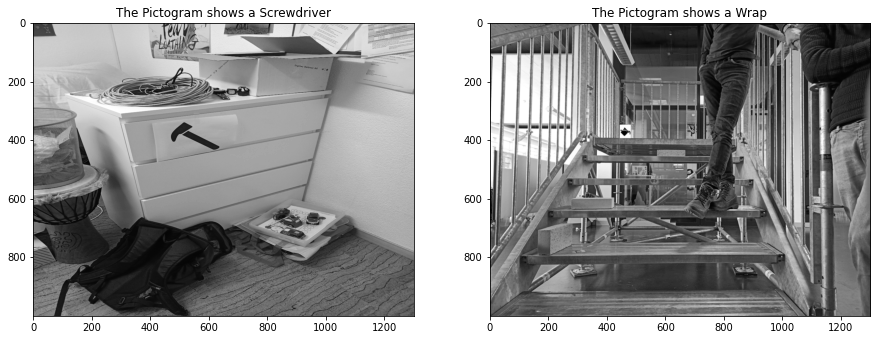

In [22]:
from_picam = cv2.cvtColor(cv2.resize(cv2.imread('img-compare/find/hammer_office.JPG'), dsize),
                              cv2.COLOR_BGR2GRAY)
from_picam2 = cv2.cvtColor(cv2.resize(cv2.imread('img-compare/find/paint_bucket_stair.JPG'), dsize),
                              cv2.COLOR_BGR2GRAY)

result = compare_pictograms(from_picam)
result2 = compare_pictograms(from_picam2)
plt.figure(figsize=(15,15))
plt.subplot(221),plt.imshow(from_picam,cmap = 'gray')
plt.title("The Pictogram shows a {}".format(result[1]))
plt.subplot(222),plt.imshow(from_picam2,cmap = 'gray')
plt.title("The Pictogram shows a {}".format(result2[1]))